In [2]:
!git clone https://github.com/tareknaous/readme.git

Cloning into 'readme'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 71 (delta 14), reused 23 (delta 0), pack-reused 0
Receiving objects: 100% (71/71), 1.96 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
import pandas as pd

In [9]:
languages = ['en', 'ru', 'fr', 'ar', 'hi']
filepaths = []

for lang in languages:
    filepaths.append(f'/content/readme/dataset/{lang}/readme_{lang}_test.xlsx')
    filepaths.append(f'/content/readme/dataset/{lang}/readme_{lang}_train.xlsx')
    filepaths.append(f'/content/readme/dataset/{lang}/readme_{lang}_val.xlsx')

datasets = {}
for filepath in filepaths:
    lang_code = filepath.split('_')[1]
    if lang_code in datasets:
        datasets[lang_code] = pd.concat([datasets[lang_code], pd.read_excel(filepath)])
    else:
        datasets[lang_code] = pd.read_excel(filepath)

datasets['en'].head()


,Domain,Sub-domain,Paragraph,Context,Sentence,Rating
0,Textbooks,Agriculture,This pricing rule relates the price markup ove...,NaN,This pricing rule relates the price markup ove...,4
1,Textbooks,Agriculture,The cross price elasticity of supply captures ...,NaN,The cross price elasticity of supply captures ...,4
2,Textbooks,Agriculture,Input prices (Pi) are important determinants o...,Prices of related goods (Pr) represent prices ...,Complements in production are goods that are p...,4
3,Textbooks,Agriculture,"If the price ceiling is set at P’, then the eq...",NaN,"If the price ceiling is set at P’, then the eq...",5
4,Textbooks,Agriculture,A large share of citrus fruit in the US is gro...,NaN,A large share of citrus fruit in the US is gro...,2


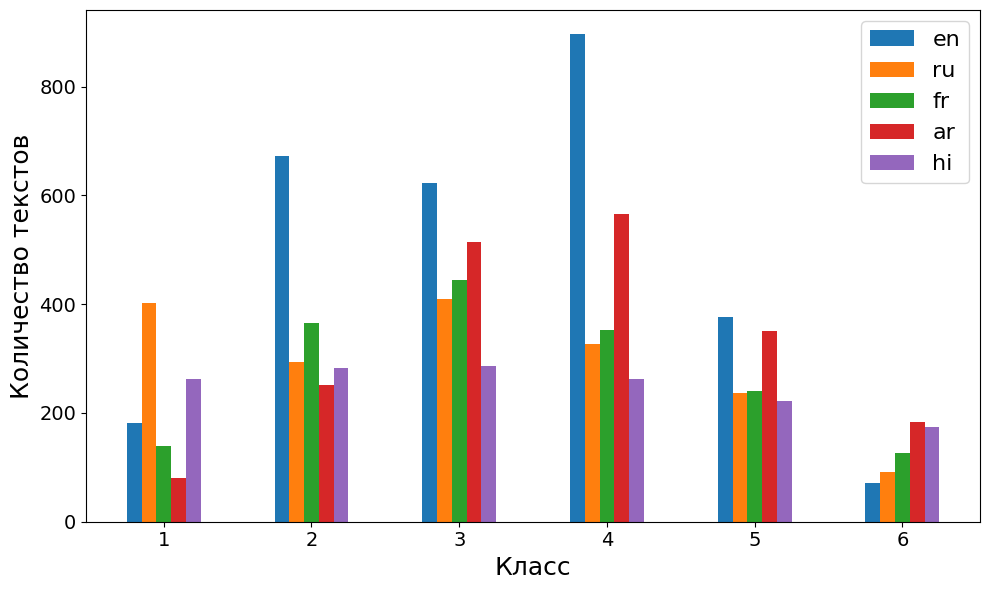

In [10]:
import matplotlib.pyplot as plt

# Словарь для хранения количества оценок по классам для каждого языка
class_counts = {}

# Перебираем каждый датасет и считаем количество каждой оценки
for lang_code, df in datasets.items():
    # Считаем встречаемость каждой оценки
    counts = df['Rating'].value_counts().sort_index()
    # Сохраняем результаты в словарь
    class_counts[lang_code] = counts

# Преобразуем словарь в DataFrame для удобства построения графика
counts_df = pd.DataFrame(class_counts).fillna(0)

# Построение графика
plt.figure(figsize=(10, 6))

# Создаем столбчатую диаграмму - каждый язык представлен набором столбцов
for i, (language, counts) in enumerate(counts_df.items()):
    plt.bar(counts_df.index + (i * 0.1), counts, width=0.1, label=language)

plt.xlabel('Класс', fontsize=18)
plt.ylabel('Количество текстов', fontsize=18)
#plt.title('ReadMe++', fontsize=20)
plt.xticks(counts_df.index + 0.2, counts_df.index)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=16)
plt.tight_layout() # Адаптирует отступы под размер фигуры
plt.show()
